# Natural Language Processing

In [1]:
import nltk

In [2]:
# nltk.download_shell()
# I currectly need the 'stopwords' one

In [3]:
# the sms spam collection contains spam / ham text messages

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

These are tab seperated values

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                       names=['label', 'message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
sns.set_style('darkgrid')

<Axes: ylabel='Frequency'>

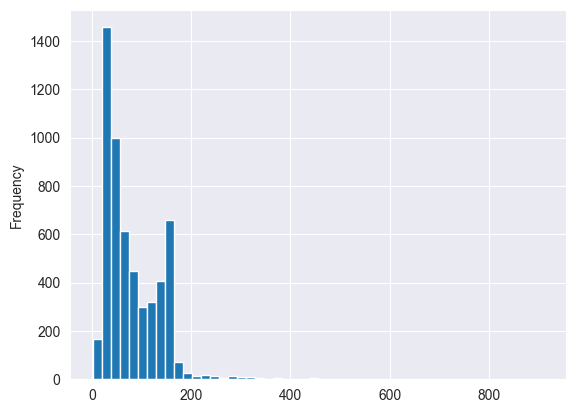

In [16]:
messages['length'].plot.hist(bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

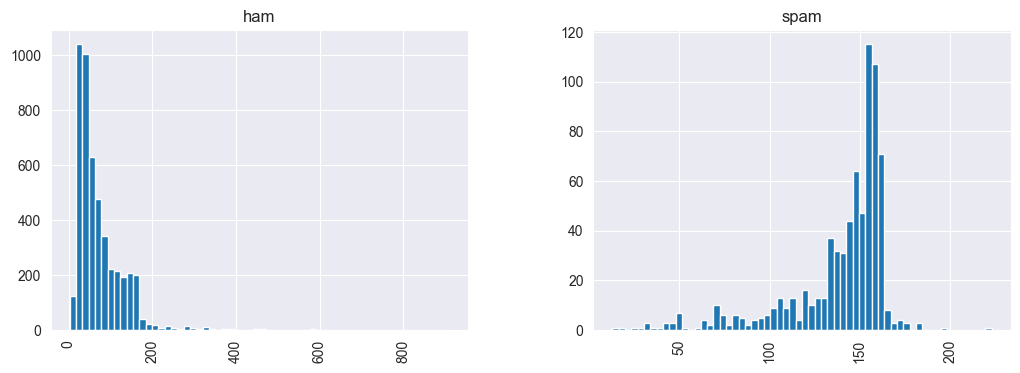

In [17]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

spam messages have a lot more charachters for the most part, so this would be a good indication

In [18]:
import string

In [19]:
sample = 'The Sample Message! Notice: it a punctuation.'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# remove punctuation
no_punc = [c for c in sample if c not in string.punctuation]

In [22]:
no_punc[:10] #removed punctuation

['T', 'h', 'e', ' ', 'S', 'a', 'm', 'p', 'l', 'e']

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
no_punc = ''.join(no_punc) #joins using whatever is in '  '

In [26]:
no_punc

'The Sample Message Notice it a punctuation'

In [27]:
no_punc.split()

['The', 'Sample', 'Message', 'Notice', 'it', 'a', 'punctuation']

In [28]:
clean = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [29]:
#keeps only the important words
clean

['Sample', 'Message', 'Notice', 'punctuation']

In [30]:
import string
from nltk.corpus import stopwords

def text_process(mess):

    '''
    1. remove punctuation
    2. remove stopwrods
    3. return list of clean text
    '''

    _clean = [c for c in mess if c not in string.punctuation]
    
    _clean = ''.join(_clean)

    return [word for word in _clean.split() if word.lower() not in stopwords.words('english')]

In [31]:
print(text_process('The big bad man.'))

['big', 'bad', 'man']


In [32]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

Stemming also is very good if you want to continue, it turns words like
- runing, run, ran -> run

(text normalization)

In [34]:
messages.to_csv('messages.csv', index=False)